In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv("cleaned_data.csv")
plt.rcParams['figure.dpi'] = 400
plt.rcParams['font.size'] = 4

In [3]:
df['default payment next month'].mean()

0.2217971797179718

In [4]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values, test_size = 0.2, random_state = 24)


In [6]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(21331, 1) (21331,) (5333, 1) (5333,)


In [7]:
print(np.mean(y_train), np.mean(y_test))

0.223102526838873 0.21657603600225014


In [8]:
from sklearn.linear_model import LogisticRegression

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [9]:
reg = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None,
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                                verbose=0, warm_start=False)

In [10]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [12]:
print(reg.score(X_test, y_test))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7834239639977498
0.7834239639977498


_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [13]:
y_proba =reg.predict_proba(X_test)

In [14]:
y_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [15]:
P = sum(y_test)
P

1155

In [16]:
TP = sum( (y_test==1) & (y_pred==1) ) # Calculating True Positives
print(TP)

TPR = TP/P # Calculating True Positive Rate
print(TPR)

0
0.0


In [17]:
FN = sum((y_test == 1) & (y_pred == 0))
print(FN)

FNR = FN/P
print(FNR)

1155
1.0


In [18]:
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
FP = sum((y_test==0) & (y_pred==1))
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [19]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[4178    0]
 [1155    0]]


In [20]:
prob_sum = np.sum(y_proba, 1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [21]:
prob_sum.shape

(5333,)

In [22]:
np.unique(prob_sum)

array([1.])

In [23]:
pos_proba = y_proba[:, 1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

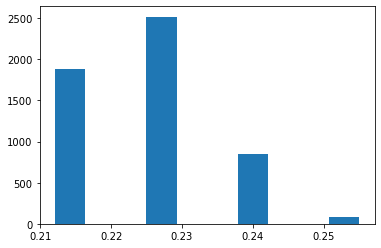

In [24]:
plt.hist(pos_proba)
plt.show()

<IPython.core.display.Javascript object>

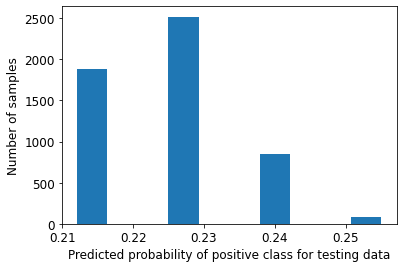

In [25]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')
plt.show()

In [26]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

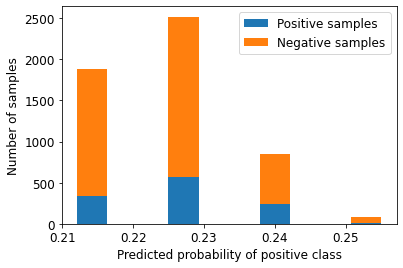

In [27]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')
plt.show()

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [28]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
print(fpr, tpr, thresholds)

[0.         0.01842987 0.16419339 0.63140258 1.        ] [0.         0.004329   0.21212121 0.7030303  1.        ] [1.2549944  0.2549944  0.24007604 0.22576598 0.21207085]


_________________________________________________________________________
**Now, plot the ROC curve.**


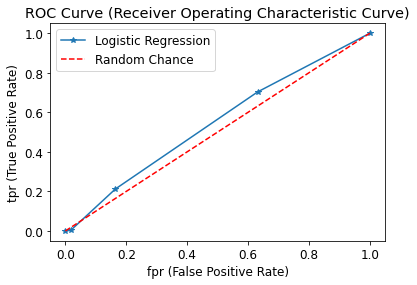

In [29]:
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic Regression', "Random Chance"])
plt.xlabel('fpr (False Positive Rate)')
plt.ylabel('tpr (True Positive Rate)')
plt.title('ROC Curve (Receiver Operating Characteristic Curve)')
plt.show()

In [30]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [31]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pos_proba)
print(precision, recall, thresholds)

[0.21657604 0.23536232 0.26315789 0.06097561 1.        ] [1.         0.7030303  0.21212121 0.004329   0.        ] [0.21207085 0.22576598 0.24007604 0.2549944 ]


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


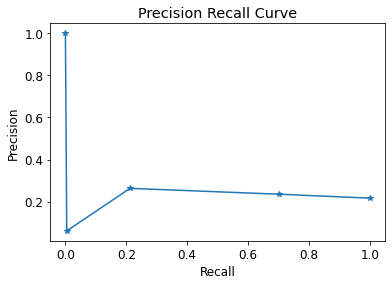

In [32]:
plt.plot(recall, precision, '*-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [33]:
metrics.auc(recall, precision) # auc is a function used to calculate area under curve

0.22544274282968607

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

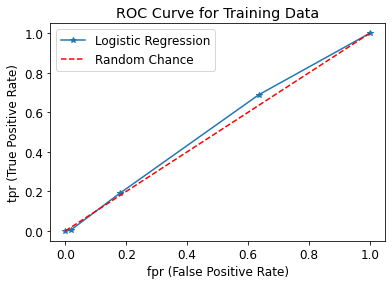

In [34]:
# getting the training samples probability predictions
y_train_prob = reg.predict_proba(X_train)

# retriving all positiv class probabilities
train_pos_proba = y_train_prob[:,1]

# getting the required parameters
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_pos_proba)

# plotting roc-auc cuve
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic Regression', "Random Chance"])
plt.xlabel('fpr (False Positive Rate)')
plt.ylabel('tpr (True Positive Rate)')
plt.title('ROC Curve for Training Data')
plt.show()

    How is this different, conceptually and quantitatively, from your earlier calculation?
